In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 2. 텐서플로우를 활용한 머신러닝
writen by [Youngwon Seo](https://youngwonseo.github.io/)

## 선형회귀와 로지스틱회귀
머신러닝의 기초이며 핵심일 수 있는 선형회귀와 로지스틱회귀를 학습합니다.

## 2.1 머신러닝의 종류
![](https://vitalflux.com/wp-content/uploads/2018/02/Screen-Shot-2018-02-04-at-8.09.33-PM.png)

## 2.2 선형 회귀(Linear Regression)


선형회귀는 주어진 데이터를 선형함수에 fitting하게 만드는 모델(hypothesis)을 찾는 알고리즘입니다.

데이터가 주어졌을때 가장 적합한 직선찾기, 즉 x를 y로 출력하는 함수를 찾는것이 선형회귀입니다. 

아래의 그림에서 주어진 데이터는 x, y쌍에 해당하는 파란점들입니다.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/400px-Linear_regression.svg.png)

x가 0일때 y가 5, x가 10일때 y가 6.5, 즉 기저는 5 스케일링값은 0.15(x가 1증시할때 y가 0.15씩 증가하는 직선)

선형회귀를 구현하기 위해 테스트 데이터를 생성합니다.

In [0]:
trX = np.linspace(-1, 1, 51)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33

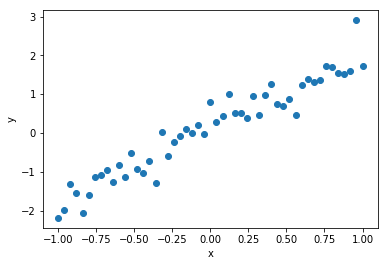

In [15]:
plt.plot(trX, trY, "o")
plt.ylabel('y')
plt.xlabel('x')
plt.show()

## 2.2.1 모델(model, hypothesis)

여기서 모델이란 입력 X에 대해 원하는 출력 Y를 만들어내는 W를 가지고 있는 함수입니다. 이를 hypothesis라 하며 다음과 같은 수식으로 나타냅니다.

$$ h_\theta (x) = \theta_0 + \theta_1 x $$

더 심플하게 다음과 같이 표현합시다.

$$ h_\theta (x) = \theta x $$

먼저 주어지는 (x,y)를 입력하기 위한 placeholder입니다.

In [0]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [0]:
def model(x, theta):
    return tf.multiply(x, theta)

In [0]:
theta = tf.Variable(0.0)
y_model = model(X, theta)

## 2.2.2 비용함수(cost function, loss function)

주어진 y와 모델의 출력 y' 이 얼마나 유사한가를 계산하기 위해 비용함수가 사용됩니다. 유사하면 할수록 비용함수의 결과가 작아집니다. 이를 계산하기 간단하게 y와 모델의 출력의 차를 계산하고 제곱합시다. 제곱을 하는 이유는 음수값을 비용합수에 포함시키지 않기 위해서입니다.

$$ cost(\theta)=( h_\theta (x)  - y)^2 $$

In [0]:
cost = tf.square(y_model - Y)

## 2.2.3 학습하기(learning, gradient descent)
그렇다면 비용함수를 최소화 하는 theta는 어떻게 찾는것이 좋을까요?

**머신러닝에서는 이렇게 (x,y)가 주어졌을때 모델의 출력과 주어진 y의 출력의 차이를 줄여나가는 과정을 학습이라고 합니다.** 

그리고 이것이 머신러닝의 목표입니다.

$$ min_\theta \ cost(\theta) $$


그리고 이를 위해 경사하강법이 사용됩니다.경사하강법에 대한 자세한 내용은 잠시후 다루고 먼저 코드를 살펴보겠습니다.

In [0]:
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

지금까지의 코드로 다름과 같은 계산그래프가 완료되었습니다. 세션을 통해 계산그래프를 실행합니다.

In [22]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()

    for i in range(100):
        for (x, y) in zip(trX, trY):
            sess.run(train_op, feed_dict={X: x, Y: y})

    learning_result_theta = sess.run(theta)
    print(learning_result_theta)

1.9267607


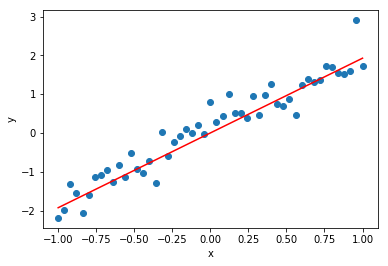

In [23]:
plt.plot(trX, trY, "o")
plt.plot(trX, trX * learning_result_theta, 'r')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

그러면 새로운 x 0.5가 주어졌을때 y가 어떻게 출력되는지 실행해 봅시다.

In [24]:
with tf.Session() as sess:
  print("result %f " % sess.run(model(0.5, learning_result_theta)))

result 0.963380 


## 2.2.4 경사하강법(Gradient Descent)
일단 선형회귀에 대한 코드는 모두 작성해 보았습니다. 이번절에서는 경사하강법에 대해 좀더 자세히 알아봅시다.

선형회귀 모델에 있어서 목표는 비용함수를 최소화하는 theta를 찾는 것이었습니다. 그리고 이것이 학습이라고 하였습니다. 

그리고 **비용함수를 최소화하기 위해 사용되는 것이 경사하강법입니다!**  즉 비용함수를 최소화하는 theta를 찾는 것이죠. 그리고 이때 비용함수에 대한 미분을 이용하여 비용함수가 줄어드는 방향으로 theta를 update해갑니다. update를 해간다는 말은 결국 반복적으로 수행하며 비용함수가 최소화되는 theta값을 찾는 것이죠.

먼저 다음식을 봅시다.

$$ \theta :=\theta - \alpha\frac{ \partial } {\partial \theta } cost(\theta) $$

이것은 weight update rule이라고도 표현되며 경사하강법에서 theta값을 찾아가는 수식을 의미합니다.

먼저 비용함수(cost)를 theta에 대해 미분합니다. 이것이 다음과 같은 표현입니다.

$$ \frac{ \partial } {\partial \theta } cost(\theta) $$

비용함수를 우리가 알고있는 수식으로 치환하겠습니다.

$$ \frac{ \partial } {\partial \theta } (  h_\theta (x)  - y)^2  $$


즉 우리는 $ ( y - \theta x )^2 $ 에 대한 미분값을 구하면 됩니다. 이때 theta에 대해 미분하는 것이죠.

위와 같은 합성함수 $ f(g(x)) $의 미분은 $ f'(g(x))g'(x) $ 로 나타냅니다. 

weight update rule에서 f는 제곱을 나타내고 g는 다항식을 나타냅니다. 즉 미분결과는 다음과 같습니다.

$$ 2 ( y - h_\theta (x) ) x  $$

$ x^2 $ 의 미분이 $ 2x $,  $ y - \theta x $ 에 대한 미분이 $ x $가 되어 결과가 위와 같이 나타납니다.

이것을 weight update rule에 적용하면 

$$ \theta :=\theta - \alpha2 ( h_\theta (x) - y ) x $$가 되는 것입니다.

상수는 버려질수 있으므로 

$$ \theta :=\theta - \alpha ( h_\theta (x) - y ) x $$

로 최종적으로 표현됩니다.


![](https://media.giphy.com/media/O9rcZVmRcEGqI/giphy.gif)

## 2.2.5 Mutivariable Linear Regression
여러개의 속성을 가진 데이터에 대한 regression을 생각해 봅시다.